# Mine Detection
- Input Variables
    - Voltage (V)
    - High (H)
    - Soil Type (S)

- Output Variable
    - Mine Type (M)

### Importing Packages

In [36]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### Importing Dataset

In [3]:
df = pd.read_excel("Normalized Dataset.xlsx")
df.head()

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


### Information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


### Describe about dataset

In [5]:
df.describe()

,V,H,S,M
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


### Checking for the Null Values

In [6]:
df.isnull().sum()

V    0
H    0
S    0
M    0
dtype: int64

### Checking for N-Unique Values

In [7]:
df.nunique()

V    196
H     12
S      6
M      5
dtype: int64

### Checking for the value count

In [9]:
df['M'].value_counts()

1    71
2    70
3    66
4    66
5    65
Name: M, dtype: int64

### Splitting into Features and Label

In [10]:
df_features = df.drop('M',axis=1)
df_label = df['M']

## Data PreProcessing 
- Checking for the outlier
- Removing outliers (If applicable)
- Train test split

### Checking for the outlier

<AxesSubplot: >

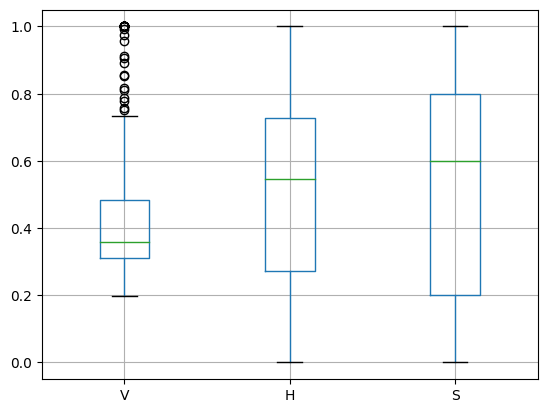

In [11]:
df_features.boxplot()

### Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_label,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(270, 3) (68, 3)
(270,) (68,)


## Model Building
- Model Selection
- Model Evaluation
    - Checking for Accuracy Score
    - Confusion Matrix
    - Precision Score
    - Recall Score
    - F1 Score
- Model Hyperparameter Tuning
- Model Fitting on Test set

- Due to less number of instances of due to small amount data, we might face low accuracy.

### Model Selection

In [22]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

### Cross Validation Score

In [23]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.36764705882352944
RandomForestClassifier 0.5735294117647058
SVC 0.4264705882352941
VotingClassifier 0.4117647058823529


### Confusion Matrix

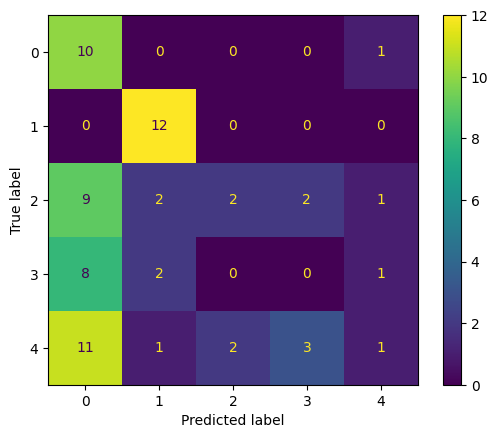

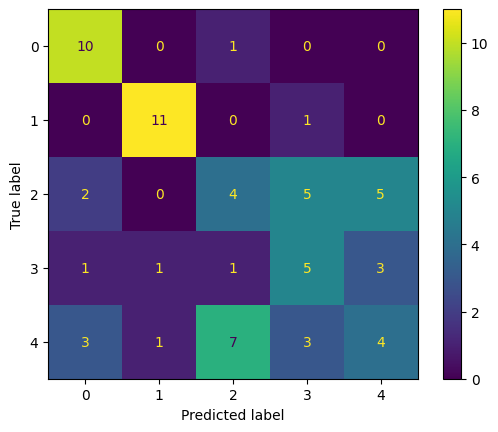

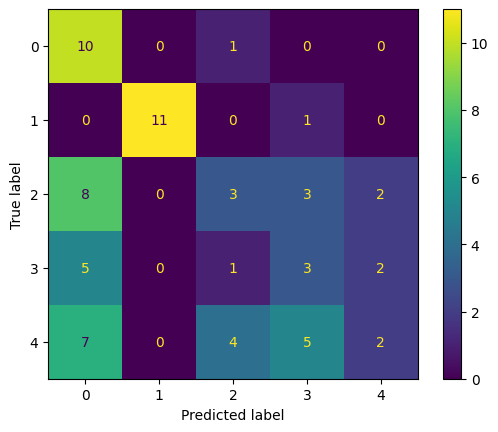

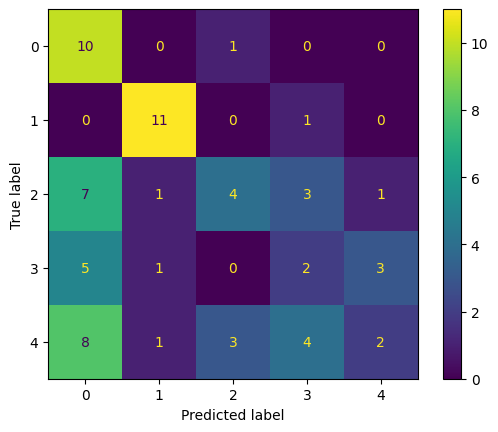

In [28]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    clf_conf = confusion_matrix(y_true=y_test,y_pred=y_pred)
    ConfusionMatrixDisplay(confusion_matrix=clf_conf).plot()
    plt.show()

### Precision, Recall, F1 Score

In [30]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_true=y_test,y_pred=y_pred,average='macro')
    recall = recall_score(y_true=y_test,y_pred=y_pred,average='macro')
    f1 = f1_score(y_true=y_test,y_pred=y_pred,average='macro')
    print(f'{clf.__class__.__name__},{precision},{recall},{f1}')

LogisticRegression,0.34380804953560373,0.41792929292929293,0.305331712622353
RandomForestClassifier,0.48248917748917747,0.5505050505050505,0.5034263820470717
SVC,0.45,0.47941919191919197,0.4223725698126547
VotingClassifier,0.4070802315963606,0.46262626262626255,0.3926666666666666


### Model Hyperparamter Tuning

In [32]:
param_grid = {'voting':['soft','hard']}
grid_search = GridSearchCV(estimator=voting_clf,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression()),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('svc', SVC())]),
             param_grid={'voting': ['soft', 'hard']})

### Grid Search Score

In [35]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'voting': 'hard'}
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])
0.4296296296296296


### Model Fitting on test set

In [ ]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))